# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#units = "metric"

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"

units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | johvi
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | urcos
Processing Record 5 of Set 1 | nova sintra
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | darovskoy
Processing Record 10 of Set 1 | mandalgovi
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | ribeira brava
Processing Record 14 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 15 of Set 1 | nsanje
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | harstad
Processing Record 18 of Set 1 | santa maria del oro
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | cidreira
Processing Record 21 of Set 1 | plettenberg bay
Processing Record 22 of Set 1 | 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,johvi,59.3592,27.4211,5.51,45,38,3.69,EE,1715081444
1,tiksi,71.6872,128.8694,0.11,99,100,8.12,RU,1715081445
2,papatowai,-46.5619,169.4708,9.61,79,64,4.34,NZ,1715081445
3,urcos,-13.6861,-71.6228,8.94,85,55,0.79,PE,1715081445
4,nova sintra,14.8667,-24.7167,24.46,70,0,2.38,CV,1715081445


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,johvi,59.3592,27.4211,5.51,45,38,3.69,EE,1715081444
1,tiksi,71.6872,128.8694,0.11,99,100,8.12,RU,1715081445
2,papatowai,-46.5619,169.4708,9.61,79,64,4.34,NZ,1715081445
3,urcos,-13.6861,-71.6228,8.94,85,55,0.79,PE,1715081445
4,nova sintra,14.8667,-24.7167,24.46,70,0,2.38,CV,1715081445


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

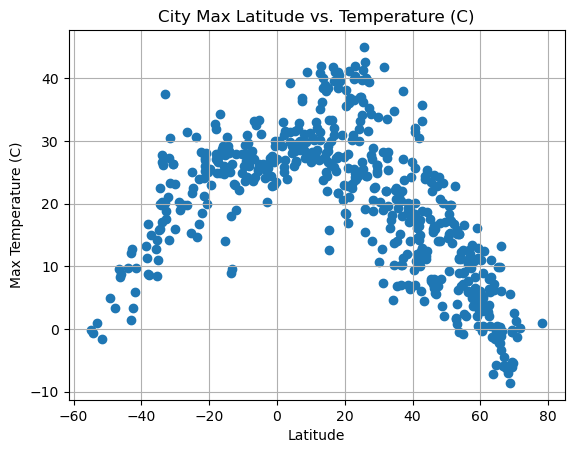

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

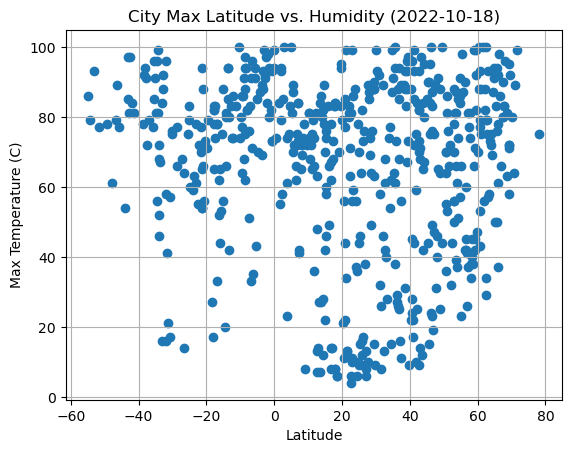

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

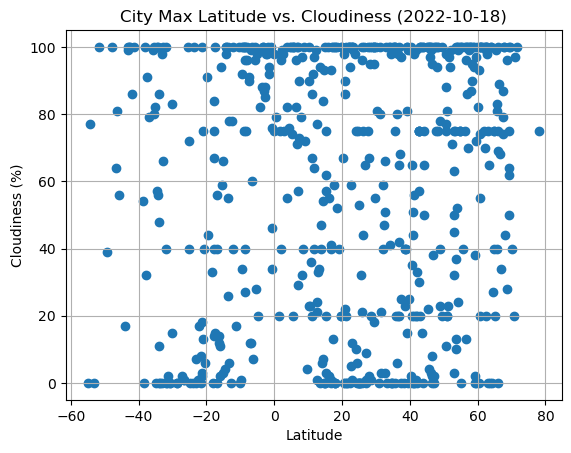

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

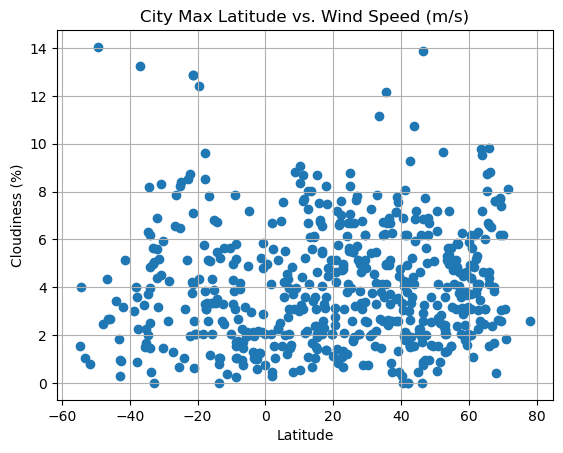

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values):   
    #Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    #Calculate regression values and line equation
    regress_values = x_values * slope + intercept
    line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    #Create scatter plot and overlay regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    #Annotate the line equation on the plot
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")
    
    
############xpert assisted with this


In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,johvi,59.3592,27.4211,5.51,45,38,3.69,EE,1715081444
1,tiksi,71.6872,128.8694,0.11,99,100,8.12,RU,1715081445
4,nova sintra,14.8667,-24.7167,24.46,70,0,2.38,CV,1715081445
5,college,64.8569,-147.8028,0.44,91,75,3.09,US,1715081445
6,bethel,41.3712,-73.4140,16.12,72,0,2.06,US,1715081307


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,papatowai,-46.5619,169.4708,9.61,79,64,4.34,NZ,1715081445
3,urcos,-13.6861,-71.6228,8.94,85,55,0.79,PE,1715081445
7,carnarvon,-24.8667,113.6333,22.56,60,0,8.42,AU,1715081445
10,port-aux-francais,-49.3500,70.2167,4.93,78,39,14.05,TF,1715081446
13,nsanje,-16.9200,35.2620,34.30,33,0,2.60,MW,1715081385


###  Temperature vs. Latitude Linear Regression Plot

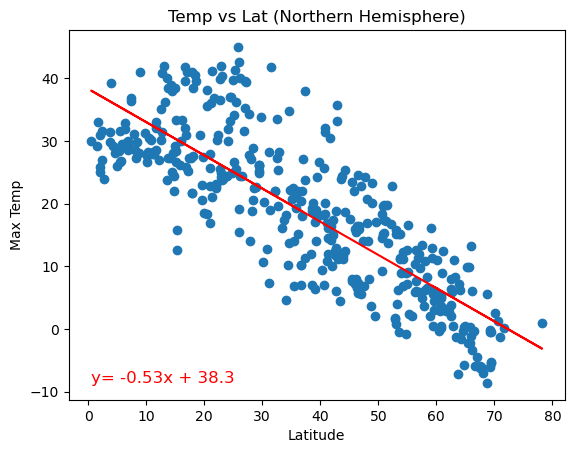

The r value is : -0.825151651517126


In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Temp vs Lat (Northern Hemisphere)")
plt.show()
print(f"The r value is : {rvalue}")

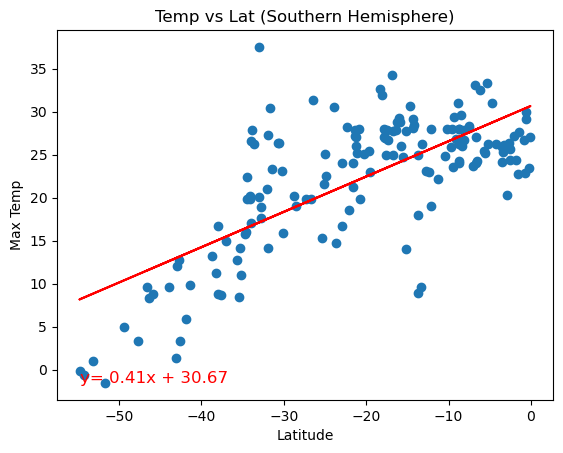

The r value is : 0.7191077390761924


In [55]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Temp vs Lat (Southern Hemisphere)")
plt.show()
print(f"The r value is : {rvalue}")

**Discussion about the linear relationship:** Temperature and Latitude appear to be positively correlated in the Southern Hemisphere. The regression shows that with a 1 degree increase in Latitude, the max temperature increases 0.41 degrees Celcius. The r value of 0.719 implies that 71.9% of the variation in temperature is explained by the variation in Latitude. 

### Humidity vs. Latitude Linear Regression Plot

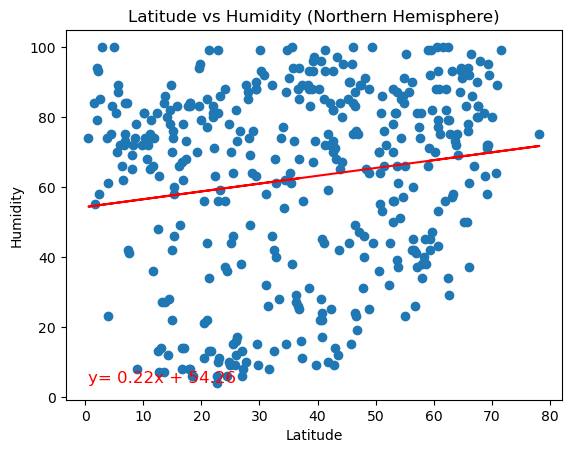

The r value is : 0.15945103719735013


In [59]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity (Northern Hemisphere)")
plt.show()
print(f"The r value is : {rvalue}")

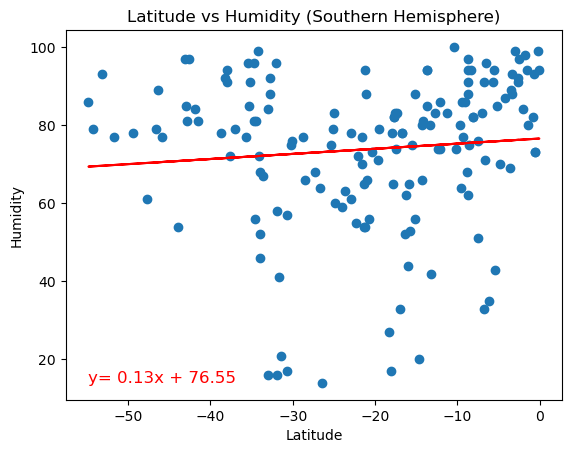

The r value is : 0.09299625047005466


In [58]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity (Southern Hemisphere)")
plt.show()
print(f"The r value is : {rvalue}")

**Discussion about the linear relationship:** These metrics do not appear to have much of a relationship. It seems that the majority of the Southern Hemisphere has humididty above 50, but the low r value does not explain the variation in the humidity when compared to latitude.

### Cloudiness vs. Latitude Linear Regression Plot

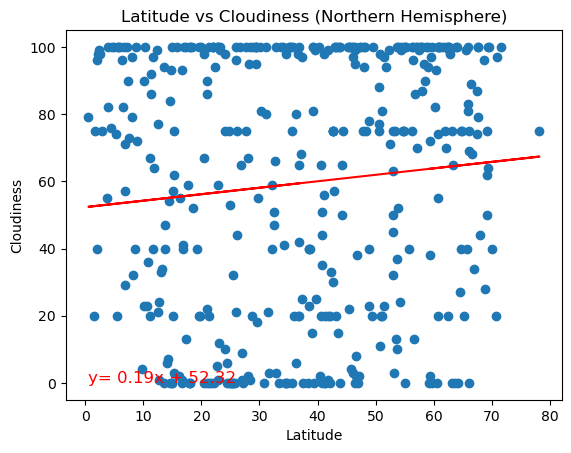

The r value is : 0.098184778430821


In [61]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness (Northern Hemisphere)")
plt.show()
print(f"The r value is : {rvalue}")

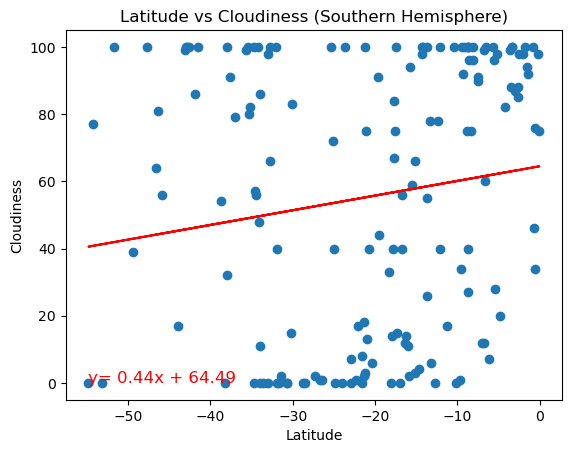

The r value is : 0.15108818113229752


In [62]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness (Southern Hemisphere)")
plt.show()
print(f"The r value is : {rvalue}")

**Discussion about the linear relationship:** The relationship between Latitude and cloudiness in the Southern Hemisphere is unclear. The relatively low r value shows that only 15% of the variation can be explained. The majority of the data seems to either be on opposite sides, with a large amount being either very cloudy or not cloudy at all.

### Wind Speed vs. Latitude Linear Regression Plot

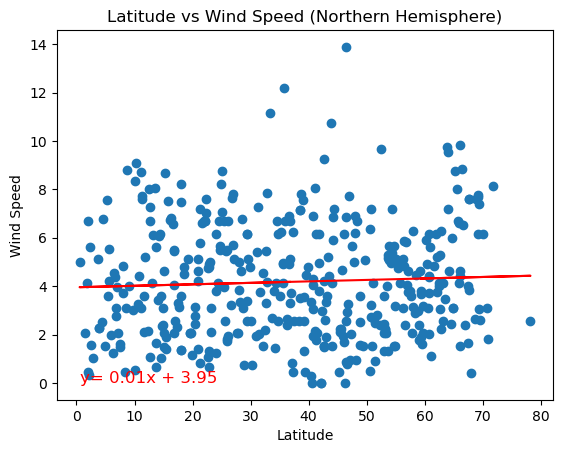

The r value is : 0.04978199831965372


In [63]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed (Northern Hemisphere)")
plt.show()
print(f"The r value is : {rvalue}")

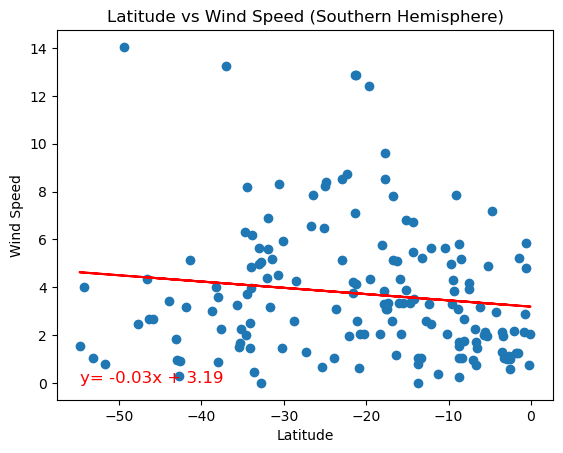

The r value is : -0.13138348770516878


In [64]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed (Southern Hemisphere)")
plt.show()
print(f"The r value is : {rvalue}")

**Discussion about the linear relationship:** The relationship between wind speed and latitude appears have a slightly negative correlation. Not much of the variation of the two variables is explained with the r value of only 13%.